In [1]:
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data prepration

In [3]:
mitosis_dir = 'softec-aic-2024/Training Images/Mitosis'
normal_dir = 'softec-aic-2024/Training Images/Normal'

img_size = (64, 64)

X = []
Y = []

for i in range(0, 226):
    filename = str(i) + '.jpg'

    if filename in os.listdir(mitosis_dir):
        label = 1
    else:
        label = 0

    img = Image.open(os.path.join(mitosis_dir if label else normal_dir, filename))
    img = img.resize(img_size)

    # Convert image to numpy array and normalize
    img_array = np.array(img) / 255.0

    X.append(img_array)
    Y.append(label)

In [19]:
X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model training

In [26]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(X, Y, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/120
8/8 [==============================] - 7s 230ms/step - loss: 0.6924 - accuracy: 0.5973 - val_loss: 0.6464 - val_accuracy: 0.6957
Epoch 2/120
8/8 [==============================] - 1s 89ms/step - loss: 0.6703 - accuracy: 0.6062 - val_loss: 0.6198 - val_accuracy: 0.6957
Epoch 3/120
8/8 [==============================] - 1s 92ms/step - loss: 0.6561 - accuracy: 0.6106 - val_loss: 0.5780 - val_accuracy: 0.6957
Epoch 4/120
8/8 [==============================] - 1s 90ms/step - loss: 0.6379 - accuracy: 0.6327 - val_loss: 0.6900 - val_accuracy: 0.4565
Epoch 5/120
8/8 [==============================] - 1s 94ms/step - loss: 0.6418 - accuracy: 0.6106 - val_loss: 0.5481 - val_accuracy: 0.6739
Epoch 6/120
8/8 [==============================] - 1s 115ms/step - loss: 0.5672 - accuracy: 0.7389 - val_loss: 0.5109 - val_accuracy: 0.7826
Epoch 7/120
8/8 [==============================] - 1s 93ms/step - loss: 0.5682 - accuracy: 0.6991 - val_loss: 0.5951 - val_accuracy: 0.6957
Epoch 8/120
8/8 [=

In [29]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2/2 [==============================] - 0s 29ms/step - loss: 0.0110 - accuracy: 1.0000
Loss: 0.0109760332852602, Accuracy: 1.0


# Checking model accuracy 

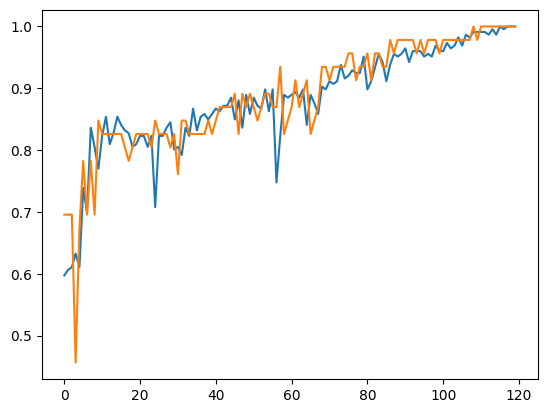

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

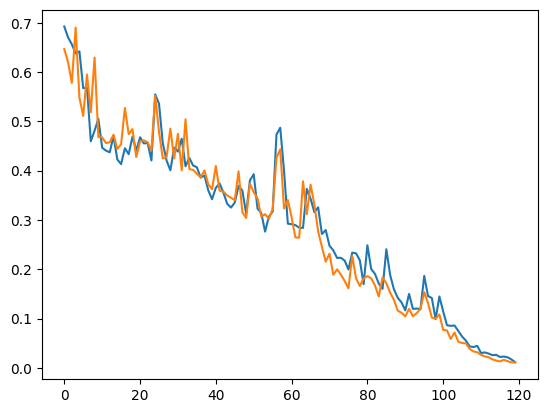

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Testing

In [12]:
test_images = []
for i in range(226,283):
    filename = str(i) + '.jpg'
    img = Image.open(os.path.join('softec-aic-2024/Testing Images', filename))
    img = img.resize(img_size)
    img_array = np.array(img) / 255.0
    test_images.append(img_array)

test_images = np.array(test_images)

2/2 [==============================] - 0s 22ms/step


In [32]:
predictions = model.predict(test_images)

2/2 [==============================] - 1s 29ms/step


In [13]:
test = pd.read_csv('softec-aic-2024/Test.csv')
test['Label'] = predictions
test['Label'] = test['Label'].apply(lambda x: 'Mitosis' if x > 0.5 else 'Normal')

In [15]:
test.to_csv('predtions.csv',index=False)